# Lead Scoring Case Study


## Multivariate Logistic Regression (Model Building)

## Problem Statement

* An education company named x education sells online courses to industry professionals.
  Many professionals lands on their website and browse for courses.
* When these people fill up a form providing their email address or phone number, they are
  classified as leads. Moreover, the company also gets leads through past referrals.
*  Once these leads are acquired , employees from sales team start making calls, writing
   emails , etc. The typical lead conversion rate is very poor(around 30%)


## Business Goal
* This will make the sales team focus on the potential customers rather than spending time
  and money on cold leads. Target is to make this lead conversion rate around 80%.

#### steps of Multivariate Logistic Regression

1. Read the dataframe and check basic information
2. Data Cleaning and Preparation
3. Univariate and bivariate Analysis
4. Test-train split
5. Scaling
6. Model Building 
   * Feature elimination 
   * Coarse tuning using RFE
   * Manual fine-tuning using p-values and VIF'S
7. Model Evaluation
    * Accuracy
    * Sensitivity and Specificity
    * Threshold determination using ROC.
    * Precision and Recall
8. Predictions on the test-set

## Reading and Understanding data

In [2]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns

%matplotlib inline

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read the data
lead_df=pd.read_csv("Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# shape of the dataframe
lead_df.shape

(9240, 37)

In [6]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# information about the columns
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data cleaning

In [8]:
# checking null value
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# check for percentage of null values in each column

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

their are so many null value in our columns

In [10]:
# Check if there are any duplicate values in the dataset

lead_df[lead_df.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


their are no duplicate value in the dataframe

####  Many of columns have a value called Select,convert those values as nan since the customer has not selected any option for those columns

In [11]:
# Converting those value to nan
lead_df['Specialization']=lead_df['Specialization'].replace('Select',np.nan)
lead_df['How did you hear about X Education']=lead_df['How did you hear about X Education'].replace('Select',np.nan)
lead_df['Lead Profile']=lead_df['Lead Profile'].replace('Select',np.nan)
lead_df['City']=lead_df['City'].replace('Select',np.nan)

In [12]:
# check dataset
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [13]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

In [14]:
# drop those columns with more then 60% null values

lead_df = lead_df.drop(lead_df.loc[:, list(round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)>60)].columns,1)

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted 

### Lead Quality

In [15]:
# checking Lead Quality
lead_df['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

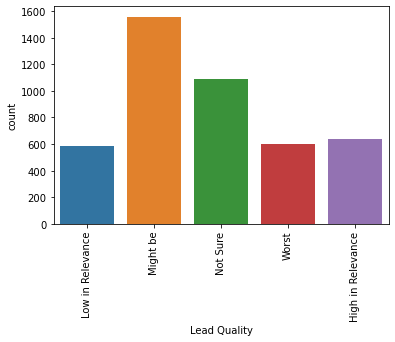

In [16]:
#countplot of Lead Quality
sns.countplot(lead_df['Lead Quality'])
xticks(rotation = 90)
plt.show()

there are five outputs
might be,not sure,high in relevence,wrost,low in relevence

we can convert nan to not sure ,it is very important columns to analysis

In [17]:
lead_df['Lead Quality']=lead_df['Lead Quality'].replace(np.nan,'Not Sure')

In [18]:
lead_df['Lead Quality'].value_counts()

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [19]:
#checking value counts
lead_df['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [20]:
#Asymmetrique Profile Index
lead_df['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [21]:
# Asymmetrique Profile Score
lead_df['Asymmetrique Profile Score'].describe()

count    5022.000000
mean       16.344883
std         1.811395
min        11.000000
25%        15.000000
50%        16.000000
75%        18.000000
max        20.000000
Name: Asymmetrique Profile Score, dtype: float64

In [22]:
# Asymmetrique Activity Score
lead_df['Asymmetrique Activity Score'].describe()

count    5022.000000
mean       14.306252
std         1.386694
min         7.000000
25%        14.000000
50%        14.000000
75%        15.000000
max        18.000000
Name: Asymmetrique Activity Score, dtype: float64

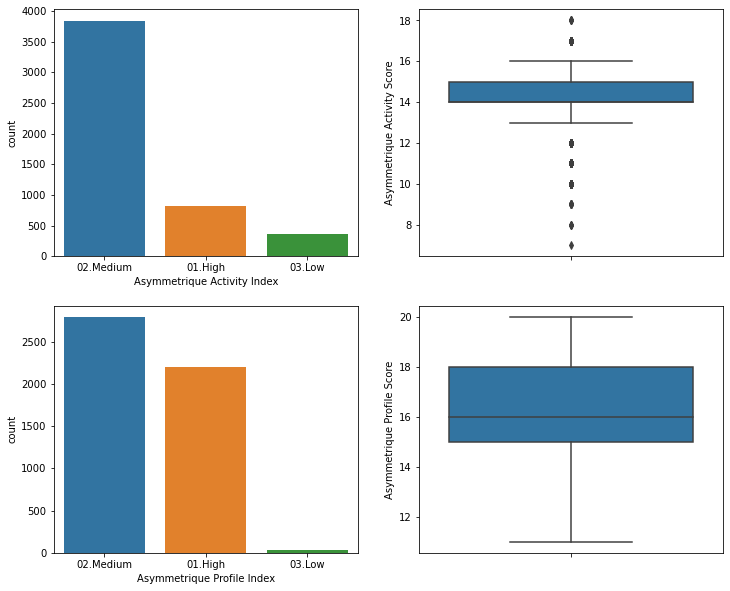

In [23]:
#count and box plot
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.countplot(lead_df['Asymmetrique Activity Index'])
plt.subplot(2,2,2)
sns.boxplot(lead_df['Asymmetrique Activity Score'],orient='v')
plt.subplot(2,2,3)
sns.countplot(lead_df['Asymmetrique Profile Index'])
plt.subplot(2,2,4)
sns.boxplot(lead_df['Asymmetrique Profile Score'],orient='v')
plt.show()

there are too much variation in columns,so its not reliable to impute them ,better  to drop this columns

In [24]:
#dropping columns
lead_df=lead_df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [25]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
Converted                                         0.00
Do Not Email                                      0.00
Lead Origin                                       0.00
Lead Number                                       0.00
Do Not Call                                       0.00
Search                                            0.00
A free cop

## City

In [26]:
#counts of city
lead_df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [27]:
lead_df['City'].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

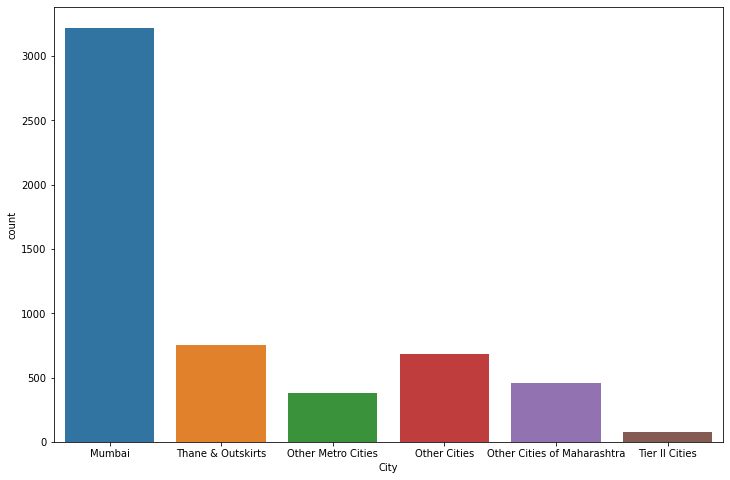

In [28]:
# count plot of city columns
plt.figure(figsize=(12,8))
sns.countplot(lead_df['City'])
plt.show()

In [29]:
3222/5571

0.5783521809369951

total is 5571 and 3222 is from mumbai,there are some other country also that details is also in country column and only specifying city defining proper decision,let's converte the value of nan as unknown

In [30]:
#convert the nan to unknown
lead_df['City']=lead_df['City'].replace(np.nan,'unknown')

In [31]:
lead_df['City'].value_counts()

unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

### Specialization

In [32]:
lead_df['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [33]:
lead_df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text major ticklabel objects>)

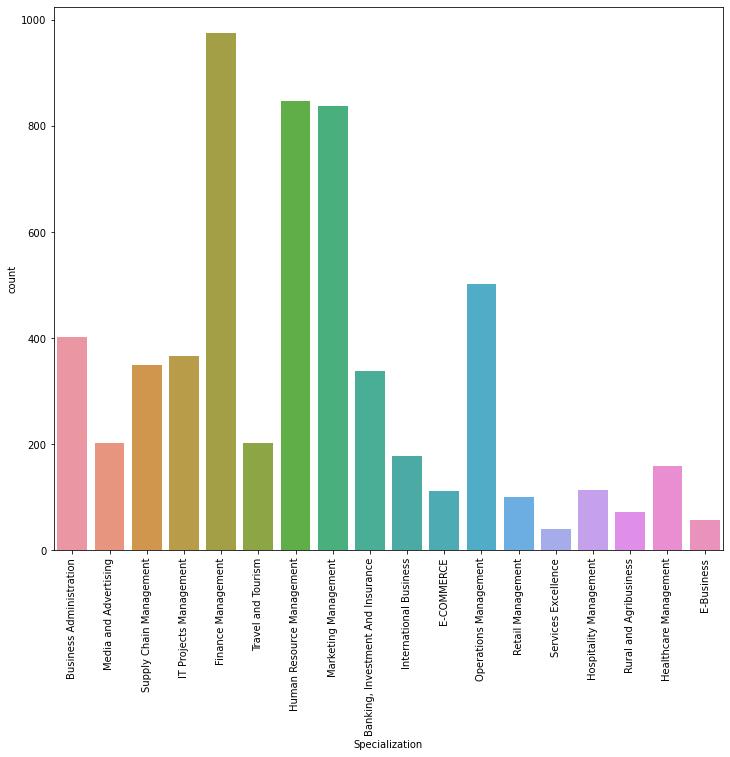

In [34]:
plt.figure(figsize=(12,10))
sns.countplot(lead_df['Specialization'])
xticks(rotation = 90)

lets impute value nan value to others

In [35]:
lead_df['Specialization']=lead_df['Specialization'].replace(np.nan,'others')

In [36]:
lead_df['Specialization'].value_counts()

others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

### Tags

In [37]:
lead_df['Tags'].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [38]:
lead_df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

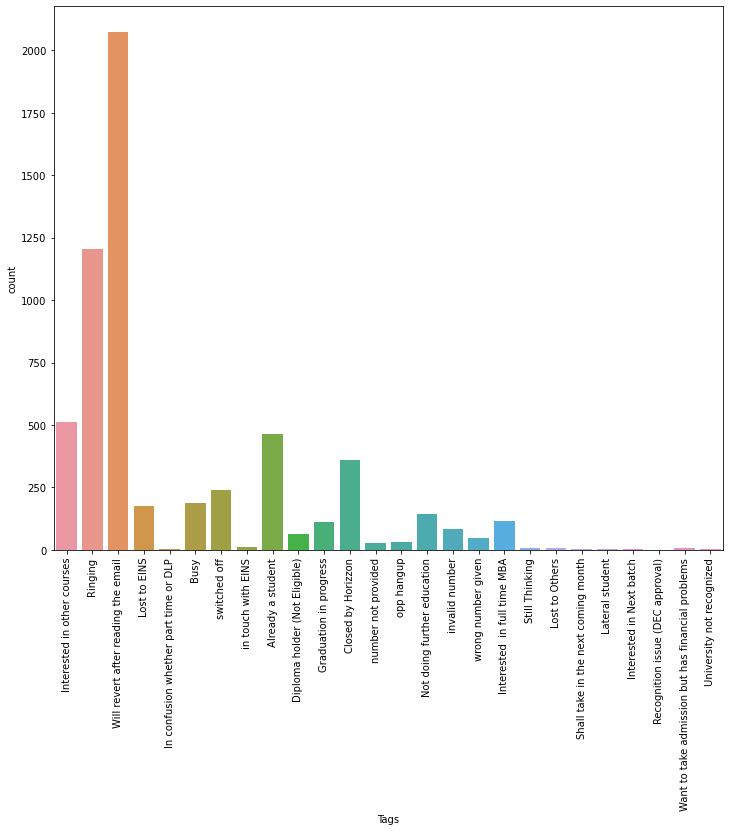

In [39]:
plt.figure(figsize=(12,10))
sns.countplot(lead_df['Tags'])
xticks(rotation = 90)

impute the nan value with 'will revert after reading the email'

In [40]:
lead_df['Tags']=lead_df['Tags'].replace(np.nan,'Will revert after reading the email')

In [41]:
lead_df['Tags'].value_counts()

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [42]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Last Notable Activity                             0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Specialization                                    0.00
Search                                            0.00
A free copy of Mastering The Interview            0.00
Magazine                                          0.00
Newspaper 

#### What matters most to you in choosing a course

In [43]:
lead_df['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [44]:
lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

replacing nan value by Better Career Prospects

In [45]:
lead_df['What matters most to you in choosing a course']=lead_df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [46]:
lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

### What is your current occupation

In [47]:
lead_df['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [48]:
lead_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### impute the nan to Unemployed

In [49]:
lead_df['What is your current occupation']=lead_df['What is your current occupation'].replace(np.nan,'Unemployed')

In [50]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2).sort_values(ascending=False)

Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Last Notable Activity                             0.00
What matters most to you in choosing a course     0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Specialization                                    0.00
What is your current occupation                   0.00
Search                                            0.00
A free copy of Mastering The Interview            0.00
Magazine                                          0.00
Newspaper 

### Country

In [51]:
lead_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Nigeria                    4
South Africa               4
Germany                    4
Canada                     4
Sweden                     3
China                      2
Italy                      2
Philippines                2
Uganda                     2
Netherlands                2
Bangladesh                 2
Ghana                      2
Asia/Pacific Region        2
Belgium                    2
Switzerland                1
Tanzania                   1
Kenya                      1
Indonesia                  1
Russia                     1
Malaysia                   1
Denmark       

maximum entry is in from india,let's replace nan value to india

In [52]:
lead_df['Country']=lead_df['Country'].replace(np.nan,'India')
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2).sort_values(ascending=False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Last Notable Activity                            0.00
What matters most to you in choosing a course    0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
Total Time Spent on Website                      0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
Search                                           0.00
A free copy of Mastering The Interview           0.00
Magazine                                         0.00
Newspaper Article           

In [53]:
# now very low missing value,it is very small value,leta remove these rows
lead_df.dropna(inplace=True)
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2).sort_values(ascending=False)

Last Notable Activity                            0.0
What matters most to you in choosing a course    0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
Search                                           0.0
A free copy of Mastering The Interview           0.0
Magazine                                         0.0
Newspaper Article                             

In [54]:
lead_df['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [55]:
lead_df['Do Not Call'].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [56]:
lead_df['Magazine'].value_counts()

No    9074
Name: Magazine, dtype: int64

In [57]:
lead_df['Search'].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [58]:
lead_df['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [59]:
lead_df['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [60]:
lead_df['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [61]:
lead_df['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

this columns contains most of no value,its better to drop this columns

In [62]:
lead_df.shape

(9074, 31)

In [63]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,Low in Relevance,No,No,unknown,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,Not Sure,No,No,unknown,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


In [64]:
Converted=round(100*(sum(lead_df['Converted'])/len(lead_df['Converted'].index)),2)
Converted

37.86

So in current data set conversion rate is 37.86%

## Univariate and bivariate Analysis

In [65]:
lead_df['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

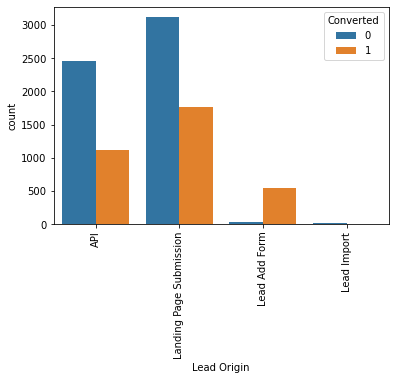

In [66]:
# count plot between lead Origin and Converted
sns.countplot(x="Lead Origin",hue="Converted",data=lead_df)
xticks(rotation=90)
plt.show()

Inference:-
* Lead import is very less in count.
* API and Landing page submission have 30-35% convertion-rate but count of lead originated from them are considerable.
* Lead Add Form has more then 90% convertion rate but count of lead are not very high. 

In [67]:
lead_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
testone                 1
WeLearn                 1
youtubechannel          1
welearnblog_Home        1
NC_EDM                  1
blog                    1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [68]:
# lead scores as duplicate of Google,we can create one value 
lead_df['Lead Source']=lead_df['Lead Source'].replace(['google'],'Google')

In [69]:
# most of the value lead is google,let's combine other lead source to Others
lead_df['Lead Source']=lead_df['Lead Source'].replace(['Click2call','Live Chat','NC_EDM','Press_Release','testone','youtubechannel','welearnblog_Home','blog','bing','Social Media','Pay per Click Ads','WeLearn'],'Others')

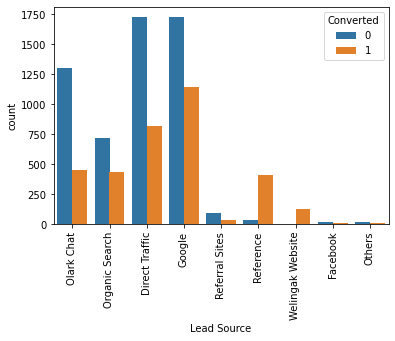

In [70]:
#count plot between Lead Source and Converted
sns.countplot(x="Lead Source",hue="Converted",data=lead_df)
xticks(rotation=90)
plt.show()

Inference-
* Google has maximum number of leads.
* Direct Traffic has also quite good number of leads.
* Reference has higher rate of conversion rate.


### Do not Email and Do not Call

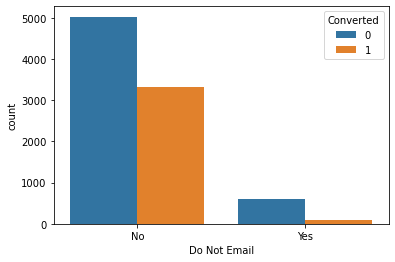

In [71]:
sns.countplot(x="Do Not Email",hue="Converted",data=lead_df)
plt.show()

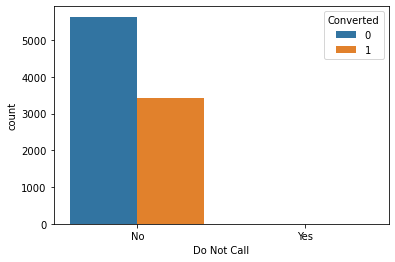

In [72]:
sns.countplot(x="Do Not Call",hue="Converted",data=lead_df)
plt.show()

### Total Visits

In [73]:
lead_df['TotalVisits'].describe(percentiles=[.05,.25,.5,.75,.90,.95,.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

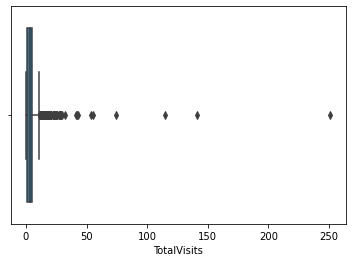

In [74]:
# boxplot of TotalVisits
sns.boxplot(lead_df['TotalVisits'])
plt.show()

we can see that there are some outliers,lets treate the outlier
 cap them 95% value of analysis

In [75]:
# Outliers Treatement
percentiles=lead_df['TotalVisits'].quantile([0.05,0.95]).values
lead_df['TotalVisits'][lead_df['TotalVisits']<=percentiles[0]]=percentiles[0]
lead_df['TotalVisits'][lead_df['TotalVisits']>=percentiles[1]]=percentiles[1]

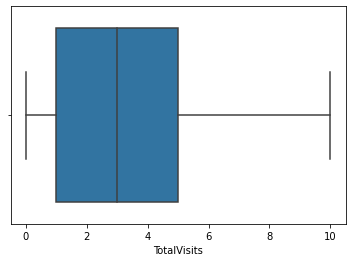

In [76]:
sns.boxplot(lead_df['TotalVisits'])
plt.show()

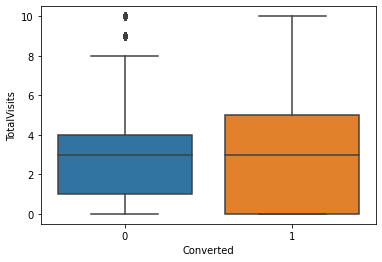

In [77]:
#boxplot between TotalVisits and Converted
sns.boxplot(y='TotalVisits',x='Converted',data=lead_df)

Both median are almost same.


#### Total Time Spent on Website

In [78]:
lead_df['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

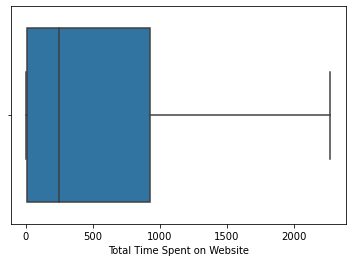

In [79]:
sns.boxplot(lead_df['Total Time Spent on Website'])
plt.show()

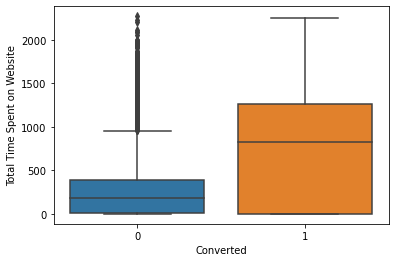

In [80]:
# box plot between Total Time Spnt on Website and Converted
sns.boxplot(y='Total Time Spent on Website',x='Converted',data=lead_df)

##### Leads spending more time on the website are more likely to converted.
website should be more engaging,then people spend more time on website.

#####  Page Views Per Visit	

In [81]:
lead_df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

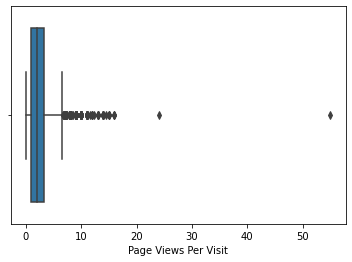

In [82]:
sns.boxplot(lead_df['Page Views Per Visit'])
plt.show()

we can see that there are some outliers,let's cap the outliers

In [83]:
# Outliers Treatement
percentiles=lead_df['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit']<=percentiles[0]]=percentiles[0]
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit']>=percentiles[1]]=percentiles[1]

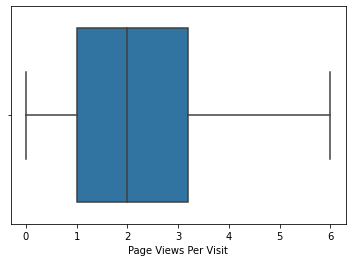

In [84]:
sns.boxplot(lead_df['Page Views Per Visit'])
plt.show()

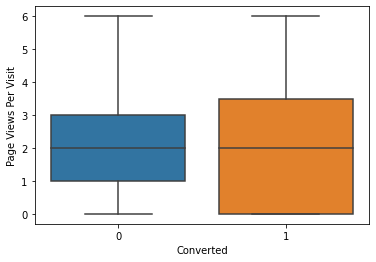

In [85]:
sns.boxplot(y='Page Views Per Visit',x='Converted',data=lead_df)

In [86]:
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [87]:
lead_df['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

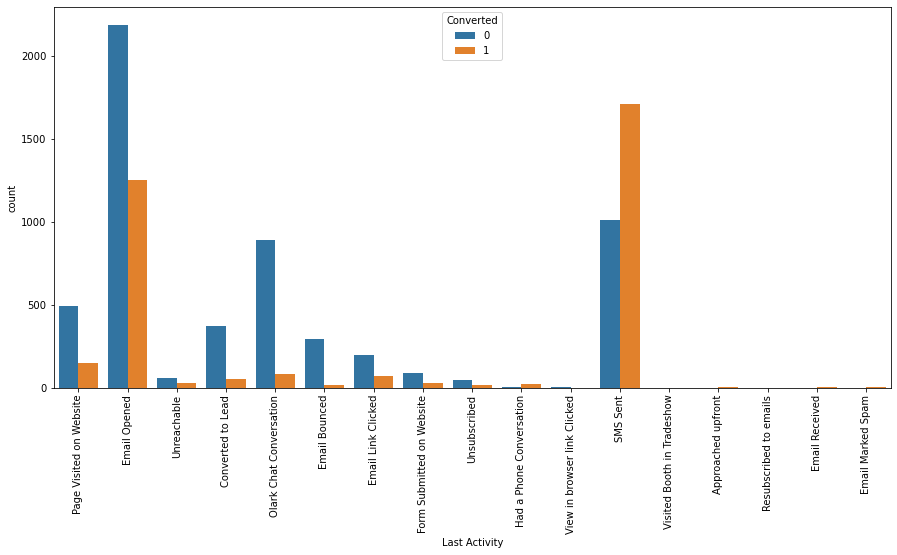

In [88]:
# count plot between Last Activity and Converted
plt.figure(figsize=(15,7))
sns.countplot(x='Last Activity',hue='Converted',data=lead_df)
xticks(rotation=90)
plt.show()

In [89]:
# Let's keep last Activity as such and club all others 'other_Activity'
lead_df['Last Activity']=lead_df['Last Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Email Received','Resubscribed to emails','View in browser link Clicked','Visited Booth in Tradeshow','Approached upfront'],'Other_Activity')


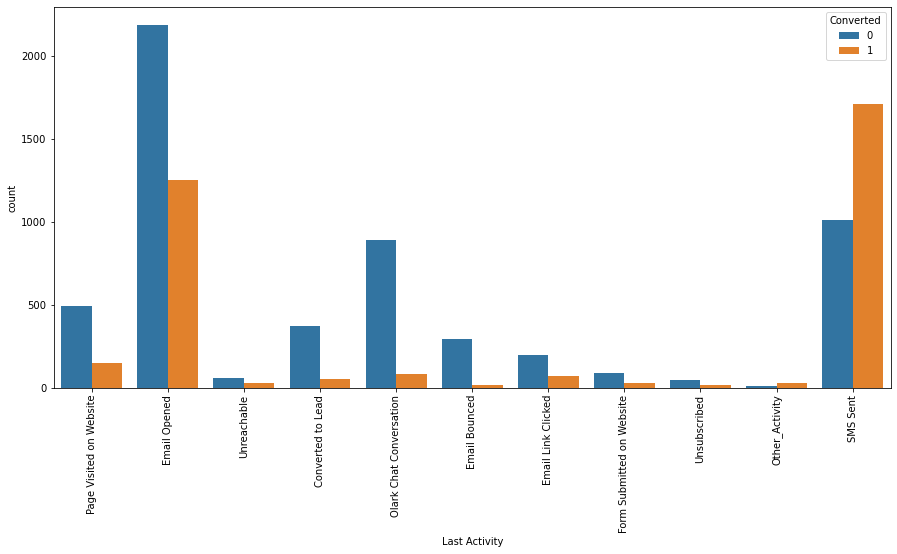

In [90]:
# to check once again
plt.figure(figsize=(15,7))
sns.countplot(x='Last Activity',hue='Converted',data=lead_df)
xticks(rotation=90)
plt.show()

* In sms sent maximum number of convertions.
* very few email is bounced.

In [91]:
lead_df['Country'].describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

In [92]:
lead_df['Specialization'].describe()

count       9074
unique        19
top       others
freq        3282
Name: Specialization, dtype: object

In [93]:
lead_df['Specialization'].value_counts()

others                               3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

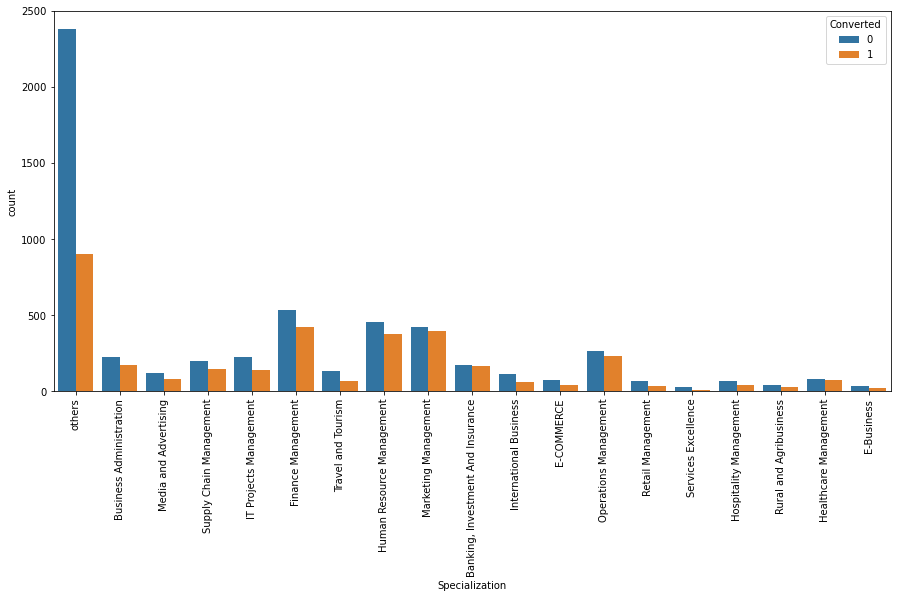

In [94]:
# count plot between Specialization and Converted
plt.figure(figsize=(15,7))
sns.countplot(x='Specialization',hue='Converted',data=lead_df)
xticks(rotation=90)
plt.show()

#####  What is your current occupation

In [95]:
lead_df['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

In [96]:
lead_df['What is your current occupation'].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

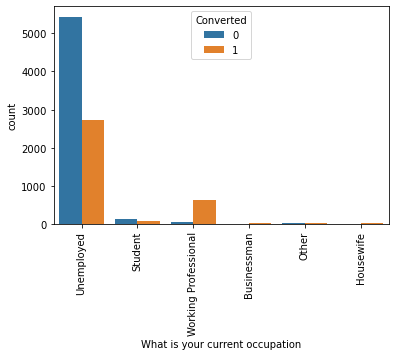

In [97]:
sns.countplot(x='What is your current occupation',hue='Converted',data=lead_df)
xticks(rotation=90)
plt.show()

* Unemployed leads most number of conversion rate,because people is more focusing for better job opportunity.
* Working Professional a has more conversion rate.

In [98]:
lead_df['What matters most to you in choosing a course'].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

In [99]:
lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9072
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [100]:
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [101]:
lead_df['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [102]:
lead_df['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

### Tags

In [103]:
lead_df['Tags'].describe()

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

In [104]:
lead_df['Tags'].value_counts()

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

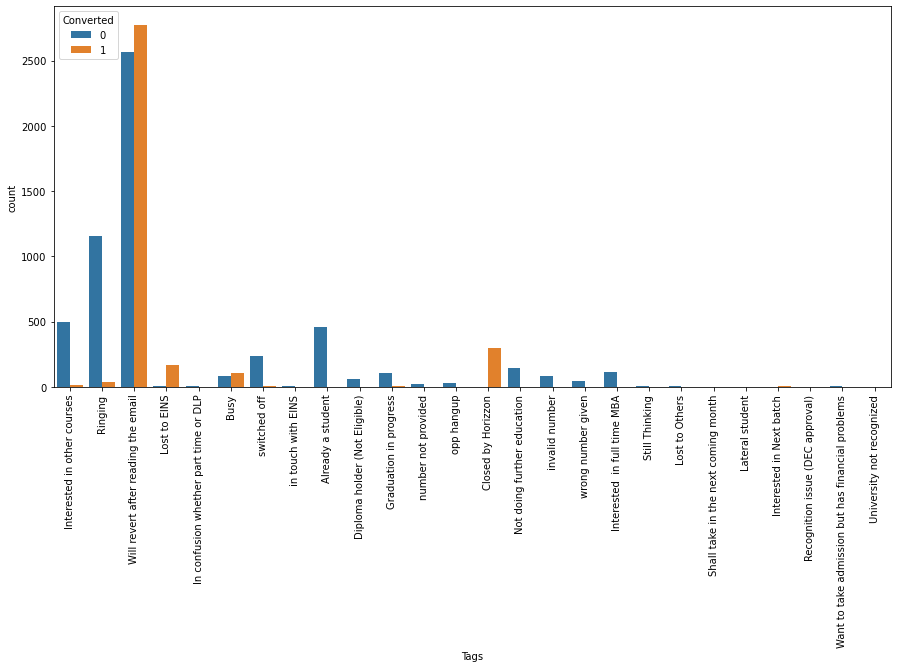

In [105]:
# count plot between Tags and Converted
plt.figure(figsize=(15,7))
sns.countplot(x='Tags',hue='Converted',data=lead_df)
xticks(rotation=90)
plt.show()

we will revert after reading the email has conversion rate is very high.

In [106]:
lead_df['Tags']=lead_df['Tags'].replace(['In confusion whether part time or DLP','in touch with EINS','Diploma holder(Not Eligible)','Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

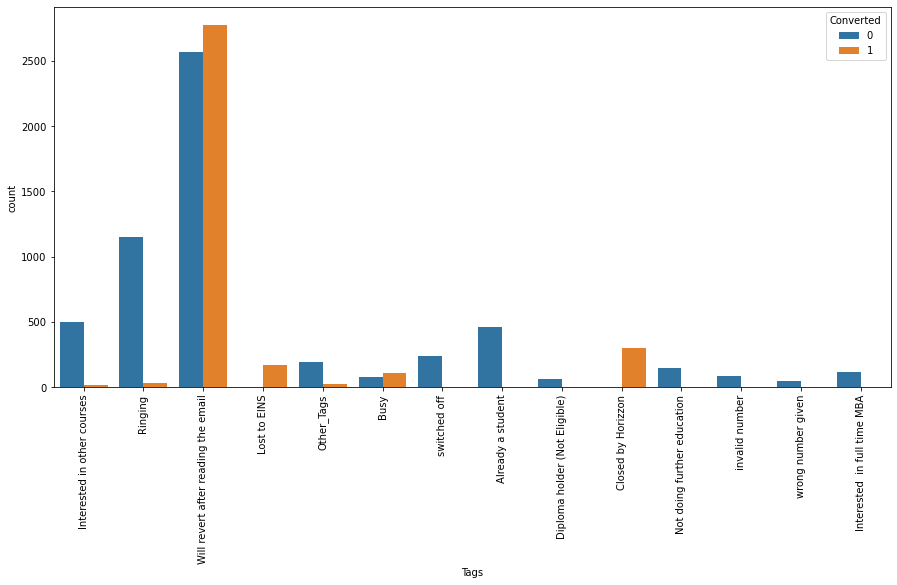

In [107]:
# to check once again
plt.figure(figsize=(15,7))
sns.countplot(x='Tags',hue='Converted',data=lead_df)
xticks(rotation=90)
plt.show()

### Lead Quality

In [108]:
lead_df['Lead Quality'].describe()

count         9074
unique           5
top       Not Sure
freq          5806
Name: Lead Quality, dtype: object

In [109]:
lead_df['Lead Quality'].value_counts()

Not Sure             5806
Might be             1519
Worst                 601
High in Relevance     592
Low in Relevance      556
Name: Lead Quality, dtype: int64

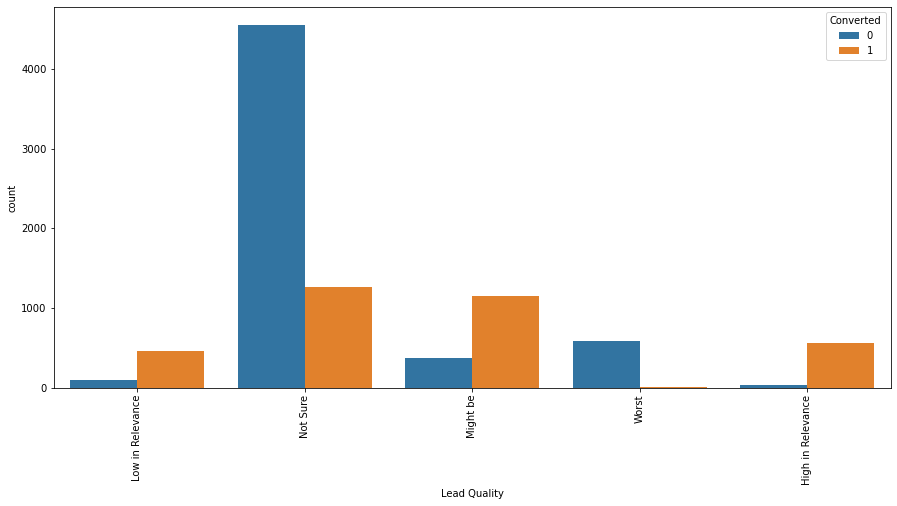

In [110]:
# count plot between lead Quality and Converted
plt.figure(figsize=(15,7))
sns.countplot(x='Lead Quality',hue='Converted',data=lead_df)
xticks(rotation=90)
plt.show()

In [111]:
lead_df['Update me on Supply Chain Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

In [112]:
lead_df['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

In [113]:
lead_df['City'].describe()

count        9074
unique          7
top       unknown
freq         3575
Name: City, dtype: object

In [114]:
lead_df['City'].value_counts()

unknown                        3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

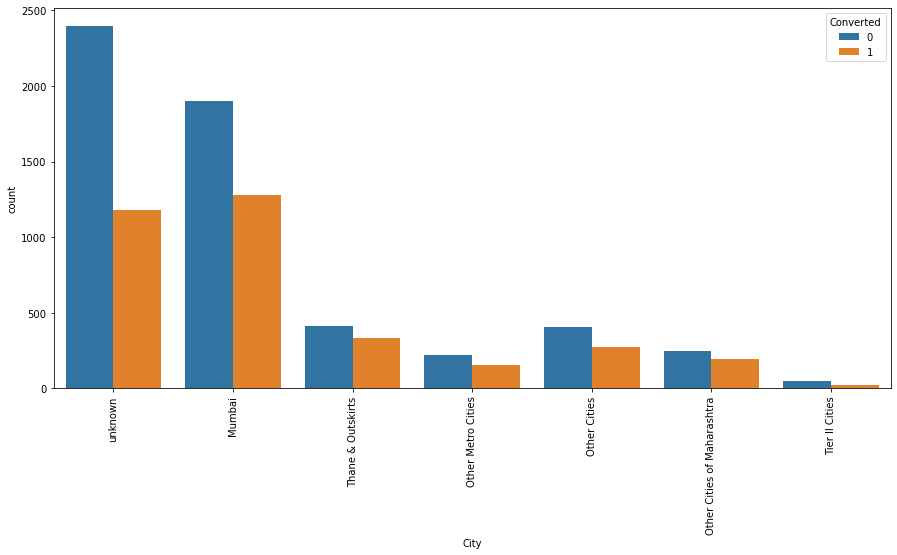

In [115]:
#countplot between city and converted
plt.figure(figsize=(15,7))
sns.countplot(x='City',hue='Converted',data=lead_df)
xticks(rotation=90)
plt.show()

* most lead from mumbai


#### I agree to pay the amount through cheque

In [116]:
lead_df['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

In [117]:
lead_df['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

In [118]:
lead_df['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [119]:
lead_df['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Form Submitted on Website          1
Approached upfront                 1
Email Received                     1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

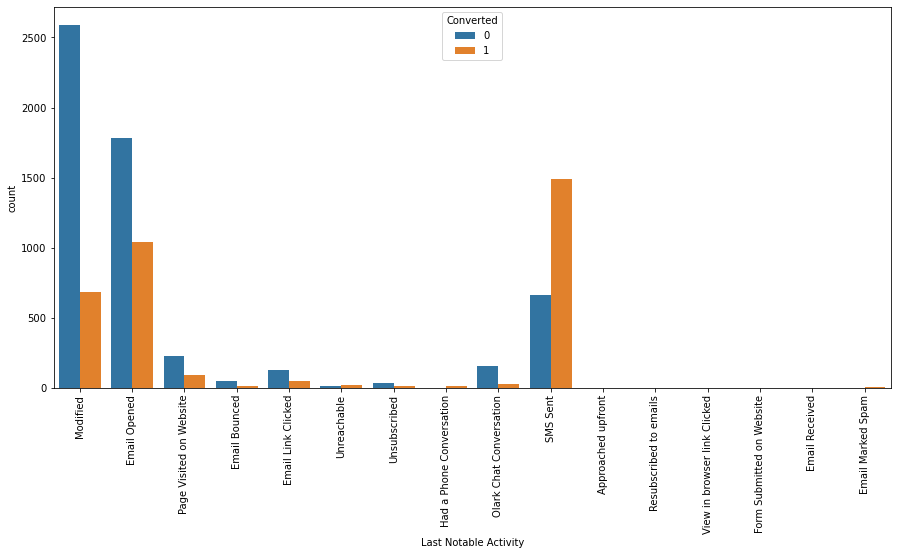

In [120]:
# count plot between Last Notable Activity and Converted
plt.figure(figsize=(15,7))
sns.countplot(x='Last Notable Activity',hue='Converted',data=lead_df)
xticks(rotation=90)
plt.show()

In [121]:
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Based on the analysis we can conclude that many of the column do not add any information to the columns,so we can drop that columns

In [122]:
lead_df=lead_df.drop(['Lead Number','Country','Search','X Education Forums','Magazine','Newspaper','Newspaper Article','Digital Advertisement','Through Recommendations','What matters most to you in choosing a course','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Do Not Call','Do Not Email'],axis=1)

In [123]:
lead_df.shape

(9074, 14)

In [124]:
lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,others,Unemployed,Interested in other courses,Low in Relevance,unknown,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,others,Unemployed,Ringing,Not Sure,unknown,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


# Data Preparation

In [125]:
lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,others,Unemployed,Interested in other courses,Low in Relevance,unknown,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,others,Unemployed,Ringing,Not Sure,unknown,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


### For categorical variables with multiple levels, create dummy features

In [126]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_df[['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy1.head()


,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [127]:
# Adding the results to the master dataframe
lead_df = pd.concat([lead_df, dummy1], axis=1)

In [128]:
lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,others,Unemployed,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,others,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,others,Unemployed,...,0,0,1,0,0,0,0,0,0,0


In [129]:
lead_df.shape

(9074, 96)

In [130]:
lead_df=lead_df.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'],axis=1)

In [131]:
lead_df.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


## Test-Train Split

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
# putting featue variable to x
X=lead_df.drop(['Prospect ID','Converted'],axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [134]:
# putting response variable to y
y=lead_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [135]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

# Feature Scaling

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4750,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [138]:
#Conversion rate
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted

37.85541106458012

We have almost 38% Conversion rate.

# Model Building

### first  model in training dataset

In [139]:
import statsmodels.api as sm

In [140]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6265
Model Family:                Binomial   Df Model:                           85
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1258.2
Date:                Sat, 06 Feb 2021   Deviance:                       2516.5
Time:                        22:03:56   Pearson chi2:                 4.17e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.2877   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
TotalVisits                                              0.2116      0.087      2.442      0.015       0.042       0.382
Total Time Spent on Website                              1.1467      0.064     18.045      0.000       1.022       1.271
Page Views Per Visit                                    -0.3309      0.099     -3.352      0.001      -0.524      -0.137
Lead Origin_Landing Page Submission                     -0.8447      0.238     -3.551      0.000      -1.311      -0.378
Lead Origin_Lead Add Form                               -0.3354      1.239     -0.271      0.787      -2.765       2.094
Lead Origin_Lead Import                                 29.7265   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -28.2126   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.2581      0.155      1.670      0.095      -0.045       0.561
Lead Source_Olark Chat                                   0.9319      0.233      3.999      0.000       0.475       1.389
Lead Source_Organic Search                               0.2481      0.209      1.186      0.236      -0.162       0.658
Lead Source_Others                                       0.6313      0.790      0.799      0.424      -0.917       2.179
Lead Source_Reference                                    1.6700      1.297      1.288      0.198      -0.872       4.212
Lead Source_Referral Sites                              -0.0668      0.491     -0.136      0.892      -1.030       0.896
Lead Source_Welingak Website                             5.3235      1.440      3.696      0.000       2.501       8.146
Last Activity_Email Bounced                             -1.8172      0.816     -2.226      0.026      -3.417      -0.217
Last Activity_Email Link Clicked                         0.8020      0.642      1.249      0.212      -0.456       2.060
Last Activity_Email Opened                              -0.0003      0.384     -0.001      0.999      -0.754       0.753
Last Activity_Form Submitted on Website                  0.1210      0.596      0.203      0.839      -1.048       1.290
Last Activity_Olark Chat Conversation                   -0.5882      0.391     -1.505      0.132      -1.354       0.178
Last Activity_Other_Activity                             1.3182      1.229      1.072      0.284      -1.091       3.728
Last Activity_Page Visited on Website                    0.3023      0.451      0.671      0.502      -0.581       1.185
Last Activity_SMS Sent                                   0

## Feature Selection using RFE

In [141]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [142]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [143]:
rfe.support_

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False, False, False,  True, False,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False])

In [144]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 36),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 35),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Facebook', False, 62),
 ('Lead Source_Google', False, 37),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 38),
 ('Lead Source_Others', False, 53),
 ('Lead Source_Reference', False, 70),
 ('Lead Source_Referral Sites', False, 46),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 34),
 ('Last Activity_Email Opened', False, 49),
 ('Last Activity_Form Submitted on Website', False, 52),
 ('Last Activity_Olark Chat Conversation', False, 15),
 ('Last Activity_Other_Activity', False, 9),
 ('Last Activity_Page Visited on Website', False, 44),
 ('Last Activity_SMS Sent', False, 7),
 ('Last Activity_Unreachable', False, 17),
 ('L

In [145]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [146]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Sp

### Assessing the model with StatsModels

In [147]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1589.8
Date:                Sat, 06 Feb 2021   Deviance:                       3179.6
Time:                        22:04:04   Pearson chi2:                 3.73e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.8426      0.279     -3.018      0.003      -1.390      -0.295
Lead Origin_Lead Add Form                      1.0110      0.360      2.806      0.005       0.305       1.717
Lead Source_Welingak Website                   3.4398      0.818      4.207      0.000       1.837       5.042
Last Activity_Email Bounced                   -1.7189      0.404     -4.256      0.000      -2.510      -0.927
What is your current occupation_Unemployed    -1.1027      0.235     -4.683      0.000      -1.564      -0.641
Tags_Busy                                      3.6120      0.333     10.840      0.000       2.959       4.265
Tags_Closed by Horizzon                        7.8234      0.763     10.258      0.000       6.329       9.318
Tags_Lost to EINS                              9.0321      0.755     11.961      0.000       7.552      10.512
Tags_Ringing                                  -1.9114      0.340     -5.618      0.000      -2.578      -1.245
Tags_Will revert after reading the email       3.7668      0.230     16.344      0.000       3.315       4.218
Tags_invalid number                          -23.3652   2.23e+04     -0.001      0.999   -4.37e+04    4.37e+04
Tags_switched off                             -2.5790      0.587     -4.395      0.000      -3.729      -1.429
Tags_wrong number given                      -22.9878   3.16e+04     -0.001      0.999    -6.2e+04     6.2e+04
Lead Quality_Not Sure                         -3.3333      0.129    -25.797      0.000      -3.587      -3.080
Lead Quality_Worst                            -3.9995      0.830     -4.817      0.000      -5.627      -2.372
Last Notable Activity_SMS Sent                 2.7503      0.121     22.669      0.000       2.513       2.988
==============================================================================================================
"""

Tags_invalid number has high p value,let's drop it

In [148]:
col = col.drop('Tags_invalid number',1)

In [149]:
col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [150]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1595.5
Date:                Sat, 06 Feb 2021   Deviance:                       3190.9
Time:                        22:04:04   Pearson chi2:                 3.67e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9671      0.283     -3.423      0.001      -1.521      -0.413
Lead Origin_Lead Add Form                      1.0426      0.362      2.879      0.004       0.333       1.752
Lead Source_Welingak Website                   3.4050      0.818      4.161      0.000       1.801       5.009
Last Activity_Email Bounced                   -1.7205      0.404     -4.259      0.000      -2.512      -0.929
What is your current occupation_Unemployed    -1.1455      0.238     -4.816      0.000      -1.612      -0.679
Tags_Busy                                      3.7941      0.332     11.442      0.000       3.144       4.444
Tags_Closed by Horizzon                        7.9768      0.763     10.454      0.000       6.481       9.472
Tags_Lost to EINS                              9.1904      0.756     12.163      0.000       7.709      10.671
Tags_Ringing                                  -1.7135      0.338     -5.072      0.000      -2.376      -1.051
Tags_Will revert after reading the email       3.9315      0.231     17.006      0.000       3.478       4.385
Tags_switched off                             -2.3747      0.585     -4.058      0.000      -3.522      -1.228
Tags_wrong number given                      -20.7930   1.17e+04     -0.002      0.999   -2.29e+04    2.28e+04
Lead Quality_Not Sure                         -3.3241      0.129    -25.781      0.000      -3.577      -3.071
Lead Quality_Worst                            -3.9952      0.831     -4.806      0.000      -5.625      -2.366
Last Notable Activity_SMS Sent                 2.7111      0.120     22.674      0.000       2.477       2.945
==============================================================================================================
"""

In [151]:
col = col.drop('Tags_wrong number given',1)

In [152]:
col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [153]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1597.5
Date:                Sat, 06 Feb 2021   Deviance:                       3195.0
Time:                        22:04:04   Pearson chi2:                 3.68e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.0196      0.283     -3.598      0.000      -1.575      -0.464
Lead Origin_Lead Add Form                      1.0547      0.363      2.904      0.004       0.343       1.766
Lead Source_Welingak Website                   3.3928      0.819      4.144      0.000       1.788       4.997
Last Activity_Email Bounced                   -1.7237      0.404     -4.268      0.000      -2.515      -0.932
What is your current occupation_Unemployed    -1.1621      0.239     -4.865      0.000      -1.630      -0.694
Tags_Busy                                      3.8681      0.330     11.714      0.000       3.221       4.515
Tags_Closed by Horizzon                        8.0424      0.763     10.542      0.000       6.547       9.538
Tags_Lost to EINS                              9.2575      0.755     12.256      0.000       7.777      10.738
Tags_Ringing                                  -1.6369      0.336     -4.868      0.000      -2.296      -0.978
Tags_Will revert after reading the email       4.0009      0.230     17.382      0.000       3.550       4.452
Tags_switched off                             -2.2963      0.584     -3.931      0.000      -3.441      -1.151
Lead Quality_Not Sure                         -3.3232      0.129    -25.790      0.000      -3.576      -3.071
Lead Quality_Worst                            -3.9854      0.833     -4.787      0.000      -5.617      -2.354
Last Notable Activity_SMS Sent                 2.7013      0.119     22.682      0.000       2.468       2.935
==============================================================================================================
"""

In [154]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.181824
1012    0.112478
9226    0.000791
4750    0.768043
7987    0.977082
1281    0.989234
2880    0.181824
4971    0.743554
7536    0.860471
1248    0.000791
dtype: float64

In [155]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.81823840e-01, 1.12478017e-01, 7.90709314e-04, 7.68043129e-01,
       9.77081512e-01, 9.89234041e-01, 1.81823840e-01, 7.43554204e-01,
       8.60471060e-01, 7.90709314e-04])

In [156]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.181824,3009
1,0,0.112478,1012
2,0,0.000791,9226
3,1,0.768043,4750
4,1,0.977082,7987


In [157]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.181824,3009,0
1,0,0.112478,1012,0
2,0,0.000791,9226,0
3,1,0.768043,4750,1
4,1,0.977082,7987,1


In [158]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3747  158]
 [ 353 2093]]


In [159]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9195402298850575


In [160]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [161]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Source_Welingak Website,1.34
5,Tags_Closed by Horizzon,1.25
9,Tags_switched off,1.16
4,Tags_Busy,1.14
6,Tags_Lost to EINS,1.07
2,Last Activity_Email Bounced,1.06
0,Lead Origin_Lead Add Form,0.65
11,Lead Quality_Worst,0.49
10,Lead Quality_Not Sure,0.21
8,Tags_Will revert after reading the email,0.17


In [162]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3747  158]
 [ 353 2093]]


   ##### Actual/Prediced   *Not Converted *converted
   ###### Not Converted    3747                 158  
   ###### Converted       353                  2093 

In [163]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9195402298850575


## Metrices beyond simply accuracy

In [164]:
TP= confusion[1,1] # true positive
TN= confusion[0,0] # true negative
FP= confusion[0,1] # false positive
FN= confusion[1,0] # false negative

In [165]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8556827473426002

In [166]:
# Let us calculate specificity
TN / float(TN+FP)

0.9595390524967989

In [167]:
# Calculate false postive rate - predicting converted  when customer has not converted
print(FP/ float(TN+FP))

0.04046094750320103


In [168]:
# positive predictive value 
print (TP / float(TP+FP))

0.929808973789427


In [169]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9139024390243903


# Plotting the ROC Curve

An ROC curve demonstrates several things:

      * It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
      * The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
      * The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [170]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [171]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

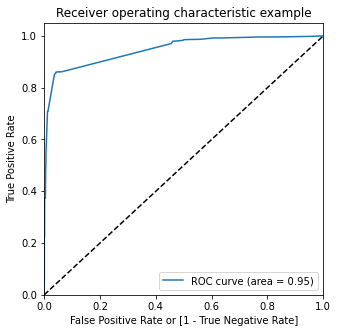

In [172]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [173]:
# let's create columns with different probability cut-off
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.181824,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.112478,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.000791,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.768043,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.977082,7987,1,1,1,1,1,1,1,1,1,1,1


In [174]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.689183  0.982829  0.505250
0.2   0.2  0.908203  0.861406  0.937516
0.3   0.3  0.919855  0.860589  0.956978
0.4   0.4  0.919383  0.858953  0.957234
0.5   0.5  0.919540  0.855683  0.959539
0.6   0.6  0.919855  0.854456  0.960819
0.7   0.7  0.920170  0.851594  0.963124
0.8   0.8  0.879861  0.709730  0.986428
0.9   0.9  0.819399  0.540883  0.993854


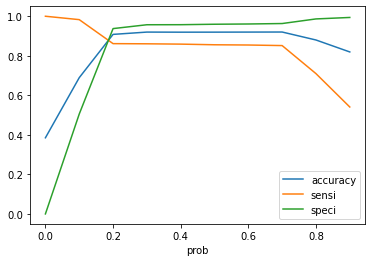

In [175]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above,0.20 is the optimum point to take it as a cutoff probabilty

In [176]:
# from the curve,0.20 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_predicted']=y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.20 else 0)
y_train_pred_final.head(20)

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.181824,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.112478,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.000791,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.768043,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.977082,7987,1,1,1,1,1,1,1,1,1,1,1,1
5,1,0.989234,1281,1,1,1,1,1,1,1,1,1,1,1,1
6,0,0.181824,2880,0,1,1,0,0,0,0,0,0,0,0,0
7,1,0.743554,4971,1,1,1,1,1,1,1,1,1,0,0,1
8,1,0.860471,7536,1,1,1,1,1,1,1,1,1,1,0,1
9,0,0.000791,1248,0,1,0,0,0,0,0,0,0,0,0,0


### Assigning the Lead Score

In [177]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.181824,3009,0,1,1,0,0,0,0,0,0,0,0,0,18
1,0,0.112478,1012,0,1,1,0,0,0,0,0,0,0,0,0,11
2,0,0.000791,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.768043,4750,1,1,1,1,1,1,1,1,1,0,0,1,77
4,1,0.977082,7987,1,1,1,1,1,1,1,1,1,1,1,1,98


In [178]:
# let's check if 80% correctly predicted based on the converted columns.
# total of final predicted conversion/non conversion counts from the actual converted rates

check_train_df=y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
check_train_df['final_predicted'].value_counts() 
 

1    2107
0     339
Name: final_predicted, dtype: int64

In [179]:
# checking the percentage of final_predicted conversion
2107/float(2107+339)

0.8614063777596075

so,we can see that final_predicted of conversion has targeted 86%.

In [180]:
# check overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

0.9082034325303102

In [181]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [182]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8614063777596075

In [183]:
# Let us calculate specificity
TN / float(TN+FP)

0.9375160051216389

In [184]:
# Calculate false positive rate - predicting conversion when customer has not converted
print(FP/ float(TN+FP))

0.06248399487836107


In [185]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8962143768609102


In [186]:
# Negative predictive value
print (TN / float(TN+ FN))

0.91525


## Precision and Recall

In [187]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3747,  158],
       [ 353, 2093]], dtype=int64)

Precision
TP / TP + FP

In [188]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.929808973789427

Recall
TP / TP + FN

In [189]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8556827473426002

### Using sklearn utilities for the same

In [190]:
from sklearn.metrics import precision_score, recall_score

In [191]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.929808973789427

In [192]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8556827473426002

### Precision and recall tradeoff

In [193]:
from sklearn.metrics import precision_recall_curve

In [194]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [195]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

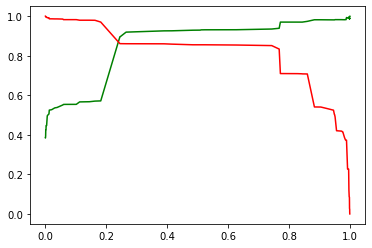

In [196]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [197]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [198]:
X_test=X_test[col]
X_test.head()

,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Email Bounced,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
3271,0,0,0,1,0,0,0,0,1,0,1,0,0
1490,0,0,0,0,0,0,0,0,1,0,0,0,0
7936,0,0,0,1,0,0,0,0,1,0,1,0,0
4216,1,0,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,0,1,0,0,0,0,1,0,1,0,0


In [199]:
X_test_sm=sm.add_constant(X_test)

Making Predictions on Test set

In [200]:
y_test_pred = res.predict(X_test_sm)

In [201]:
y_test_pred[:10]

3271    0.181824
1490    0.951722
7936    0.181824
4216    0.999690
3830    0.181824
1800    0.951722
6507    0.011653
4821    0.000409
4223    0.996224
4714    0.181824
dtype: float64

In [202]:
# Converting Y_pred to a dataframe which is an array
y_pred_1=pd.DataFrame(y_test_pred)

In [203]:
# see head
y_pred_1.head()

,0
3271,0.181824
1490,0.951722
7936,0.181824
4216,0.999690
3830,0.181824


In [204]:
# converting y_test to dataframe
y_test_df=pd.DataFrame(y_test)

In [205]:
#Putting 'Prospect ID' to index
y_test_df['Prospect ID'] =y_test_df.index

In [206]:
# Removing index for both the dataframes to concat them side by side
y_pred_1.reset_index(drop=True,inplace=True)

y_test_df.reset_index(drop=True,inplace=True)

In [207]:
# concat both y_test_df and y_pred_1

y_pred_final=pd.concat([y_test_df,y_pred_1],axis=1)

In [208]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.181824
1,1,1490,0.951722
2,0,7936,0.181824
3,1,4216,0.999690
4,0,3830,0.181824


In [209]:
# Renaming the column to Converted_prob
y_pred_final=y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [210]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]

In [211]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.181824
1,1490,1,0.951722
2,7936,0,0.181824
3,4216,1,0.999690
4,3830,0,0.181824


we are taking sensitivity,specifity and accuracy cut-off 0.20

In [212]:
y_pred_final['final_predicted'] =y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.20 else 0)

In [213]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.181824,0
1,1490,1,0.951722,1
2,7936,0,0.181824,0
3,4216,1,0.999690,1
4,3830,0,0.181824,0


In [214]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map(lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.181824,0,18
1,1490,1,0.951722,1,95
2,7936,0,0.181824,0,18
3,4216,1,0.999690,1,100
4,3830,0,0.181824,0,18


In [215]:
# check if 80% cases are correctly predicted based on the canverted columns
# tatal of final predicted conversion from the actual converted rates

check_test_df=y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
check_test_df['final_predicted'].value_counts()

1    836
0    153
Name: final_predicted, dtype: int64

In [216]:
# check the percentage of final_predicted conversion in test set
836/float(836+153)

0.8452982810920121

so,we can see that final_predicted of conversion has targeted 84%.

In [217]:
#let's check overall accuracy
metrics.accuracy_score(y_pred_final.Converted,y_pred_final.final_predicted)

0.9041498347410943

In [218]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1626,  108],
       [ 153,  836]], dtype=int64)

In [219]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [220]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8452982810920121

In [221]:
# Let us calculate specificity
TN / float(TN+FP)

0.9377162629757786

In [222]:
#False positive rate(FPR)- predicting conversion when customer has not converted

print(FP/ float(TN+FP))

0.06228373702422145


In [223]:
# positive predictive value
print(TP /float(TP+FP))

0.885593220338983


In [224]:
# negative predictive value
print(TN/float(TN+FN))

0.9139966273187183


## conclusion

* We have considered the optimal cut off based on specificity and sensitivity for
  calculating final prediction on the test set.

* Accuracy, Specificity, Sensitivity for the test set turned out to be 90%, 84% and
  93% which is approximated closer to the values calculated for train data set.

* Also the lead score for train test is quite similar to lead score for test set.
* Lead Score,Lead origin and Tags are very important feature to increase the number of hot leads.